In [2]:
import pandas as pd
from sqlalchemy import create_engine, types
from sqlalchemy import text # to be able to pass string
from dotenv import dotenv_values

In [3]:
config = dotenv_values()

pg_user = config['POSTGRES_USER']  
pg_host = config['POSTGRES_HOST']
pg_port = config['POSTGRES_PORT']
pg_db = config['POSTGRES_DB']
pg_schema = config['POSTGRES_SCHEMA']
pg_pass = config['POSTGRES_PASS']

In [4]:
url = f'postgresql://{pg_user}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}'

In [5]:
engine = create_engine(url, echo=False)

In [6]:
my_schema = config['POSTGRES_SCHEMA']
with engine.begin() as conn: 
    result = conn.execute(text(f'SET search_path TO {my_schema};'))
result

In [7]:
population_selected = pd.read_sql_table('selected_population', con=engine, schema='capstone_population_analysis')
population_selected


,year,Uganda,Nigeria,Rwanda,Senegal,Ethiopia,Algeria,Egypt,South Africa,Morocco,...,Australia,New Zealand,Palau,Kiribati,Marshall Islands,"Micronesia, Federated States of",Nauru,Samoa,Solomon Islands,Tonga
0,1960,7640973.0,45053782.0,3022294.0,3340907.0,21376693.0,11424922.0,26896479.0,16440172.0,11624933.0,...,10276477.0,2371800.0,9328.0,47157.0,14703.0,43061.0,4607.0,112490.0,139688.0,66170.0
1,1961,7862217.0,45989310.0,3106779.0,3436375.0,21906102.0,11628883.0,27600898.0,16908035.0,11931085.0,...,10483000.0,2419700.0,9555.0,48323.0,15219.0,44610.0,4774.0,115496.0,142912.0,68037.0
2,1962,8092231.0,46965292.0,3186025.0,3534686.0,22465126.0,11800771.0,28337013.0,17418522.0,12253092.0,...,10742000.0,2482000.0,9793.0,49538.0,15755.0,46218.0,4979.0,118597.0,146201.0,69940.0
3,1963,8333663.0,47973575.0,3258890.0,3635876.0,23051637.0,11982118.0,29091869.0,17954564.0,12577502.0,...,10950000.0,2531800.0,10037.0,50791.0,16302.0,47744.0,5226.0,121764.0,149589.0,71885.0
4,1964,8586363.0,49012016.0,3334834.0,3740535.0,23666548.0,12179813.0,29858922.0,18511361.0,12898886.0,...,11167000.0,2585400.0,10292.0,52088.0,16852.0,49181.0,5515.0,124894.0,153085.0,73879.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2019,42999637.0,209485641.0,12776103.0,16352922.0,115737383.0,43294546.0,107553158.0,59587885.0,36210898.0,...,25334826.0,4979200.0,17798.0,123921.0,44007.0,110282.0,11587.0,209780.0,728147.0,105669.0
60,2020,44457152.0,213996181.0,13065837.0,16789219.0,118917671.0,44042091.0,109315124.0,60562381.0,36584208.0,...,25649248.0,5090200.0,17792.0,126099.0,42706.0,110916.0,11643.0,211944.0,744498.0,105704.0
61,2021,45910930.0,218529286.0,13355260.0,17220867.0,122138588.0,44761099.0,110957008.0,61502603.0,36954442.0,...,25685412.0,5111300.0,17783.0,128377.0,41367.0,111624.0,11709.0,213779.0,762591.0,105490.0
62,2022,47312719.0,223150896.0,13651030.0,17651103.0,125384287.0,45477389.0,112618250.0,62378410.0,37329064.0,...,26014399.0,5117200.0,17759.0,130469.0,40077.0,112114.0,11801.0,215261.0,781066.0,105042.0


In [8]:
population_selected.to_csv('population_selected_data.csv', index=False)

In [9]:
fertility_selected = pd.read_sql_table('selected_fertility', con=engine, schema='capstone_population_analysis')
fertility_selected.to_csv('fertility_selected_data.csv', index=False)

In [10]:
education_selected = pd.read_sql_table('selected_education', con=engine, schema='capstone_population_analysis')
education_selected.to_csv('education_selected_data.csv', index=False)

In [11]:
child_mortality_selected = pd.read_sql_table('selected_child_mortality', con=engine, schema='capstone_population_analysis')
child_mortality_selected.to_csv('child_mortality_selected_data.csv', index=False)

In [12]:
gdp_selected = pd.read_sql_table('selected_gdp', con=engine, schema='capstone_population_analysis')
gdp_selected.to_csv('gdp_selected_data.csv', index=False)

In [13]:
child_mortality_selected.drop('total', axis=1)

,year,Uganda,Nigeria,Rwanda,Senegal,Ethiopia,Algeria,"Egypt, Arab Rep.",South Africa,Morocco,...,Australia,New Zealand,Palau,Kiribati,Marshall Islands,"Micronesia, Fed. Sts.",Nauru,Samoa,Solomon Islands,Tonga
0,1960,222.9,NaN,220.8,296.0,NaN,239.6,318.3,NaN,243.2,...,24.9,27.9,NaN,199.7,121.9,126.0,NaN,107.4,168.0,NaN
1,1961,219.1,NaN,215.9,295.7,NaN,239.9,308.0,NaN,238.3,...,24.3,26.8,NaN,194.7,116.1,121.0,NaN,103.1,161.5,NaN
2,1962,215.6,NaN,212.6,296.4,NaN,240.5,298.0,NaN,233.3,...,23.7,25.8,NaN,189.2,110.7,116.0,NaN,99.0,154.9,NaN
3,1963,212.1,NaN,210.5,297.2,NaN,241.3,288.3,NaN,228.2,...,23.2,24.7,NaN,183.3,105.7,111.0,NaN,95.3,148.3,78.4
4,1964,208.7,325.2,209.5,298.0,NaN,242.4,279.2,NaN,222.8,...,22.7,23.8,NaN,177.0,101.0,106.4,NaN,110.7,141.8,73.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2019,45.5,116.9,42.0,41.8,52.1,23.5,20.1,35.6,19.4,...,3.8,4.9,23.2,59.7,31.7,26.7,29.2,20.3,20.1,11.8
60,2020,43.6,113.9,40.5,40.0,49.9,22.9,19.4,35.3,18.6,...,3.8,4.8,23.0,58.8,30.7,25.8,28.3,17.1,19.5,11.5
61,2021,42.0,110.6,39.2,38.4,48.0,22.3,18.7,34.7,17.9,...,3.8,4.7,22.8,57.7,29.6,25.0,27.3,16.6,18.9,11.2
62,2022,40.5,107.2,38.0,37.0,46.2,21.8,18.1,34.5,17.3,...,3.8,4.6,22.3,56.4,28.6,24.2,26.5,16.1,18.3,10.9


In [14]:
# Set 'year' as index only if not already set
if 'year' in child_mortality_selected.columns:
    child_mortality_selected.set_index('year', inplace=True)
if 'year' in population_selected.columns:
    population_selected.set_index('year', inplace=True)

# Get common country columns
common_countries = child_mortality_selected.columns.intersection(population_selected.columns)

# Prepare lists for both global mortality calculations
global_mortality_rate = []
global_mortality_excl_missing = []

for year in child_mortality_selected.index:
    # All countries (even with missing mortality data)
    all_countries = common_countries
    # Only valid mortality entries
    valid_countries = child_mortality_selected.loc[year, all_countries].dropna().index

    # Mortality and population values
    all_mortality = child_mortality_selected.loc[year, all_countries]
    all_population = population_selected.loc[year, all_countries]

    valid_mortality = child_mortality_selected.loc[year, valid_countries]
    valid_population = population_selected.loc[year, valid_countries]

    # Weighted calculations
    weighted_all = (all_mortality * all_population).sum() / all_population.sum()
    weighted_valid = (valid_mortality * valid_population).sum() / valid_population.sum()

    global_mortality_rate.append(weighted_all)
    global_mortality_excl_missing.append(weighted_valid)

# Add both columns to DataFrame
child_mortality_selected['global_mortality_rate'] = global_mortality_rate
child_mortality_selected['global_mortality_excl_missing'] = global_mortality_excl_missing

# Reset index to turn 'year' back into a column (if needed)
child_mortality_selected.reset_index(inplace=True)

# Show result
child_mortality_selected.head()


,year,Uganda,Nigeria,Rwanda,Senegal,Ethiopia,Algeria,"Egypt, Arab Rep.",South Africa,Morocco,...,Kiribati,Marshall Islands,"Micronesia, Fed. Sts.",Nauru,Samoa,Solomon Islands,Tonga,total,global_mortality_rate,global_mortality_excl_missing
0,1960,222.9,NaN,220.8,296.0,NaN,239.6,318.3,NaN,243.2,...,199.7,121.9,126.0,NaN,107.4,168.0,NaN,120.385000,94.472181,162.988314
1,1961,219.1,NaN,215.9,295.7,NaN,239.9,308.0,NaN,238.3,...,194.7,116.1,121.0,NaN,103.1,161.5,NaN,116.701667,93.742488,159.959161
2,1962,215.6,NaN,212.6,296.4,NaN,240.5,298.0,NaN,233.3,...,189.2,110.7,116.0,NaN,99.0,154.9,NaN,113.181667,92.513272,157.128090
3,1963,212.1,NaN,210.5,297.2,NaN,241.3,288.3,NaN,228.2,...,183.3,105.7,111.0,NaN,95.3,148.3,78.4,111.131667,90.892877,154.503275
4,1964,208.7,325.2,209.5,298.0,NaN,242.4,279.2,NaN,222.8,...,177.0,101.0,106.4,NaN,110.7,141.8,73.6,113.591667,96.993078,158.654670


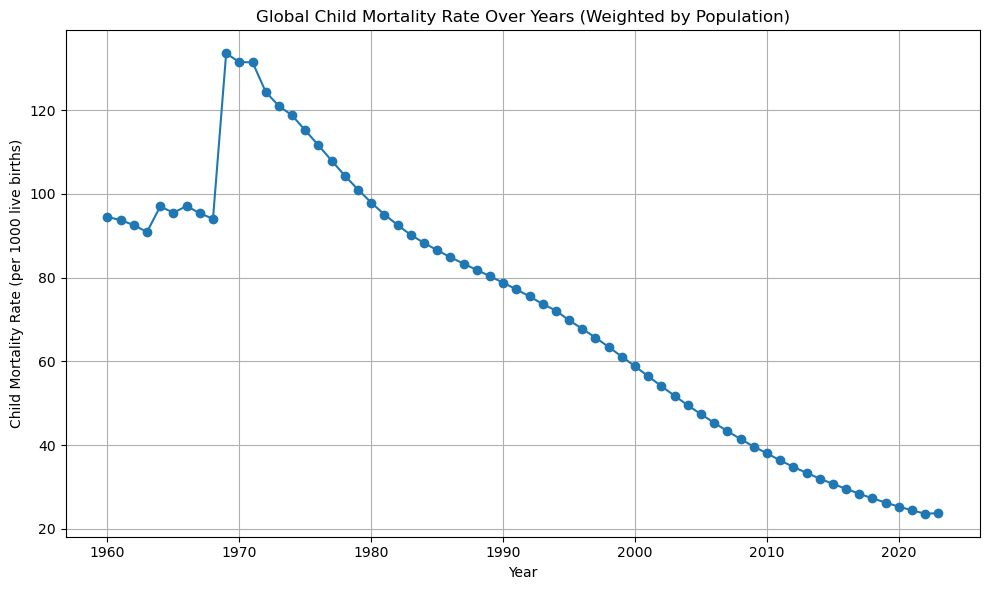

In [15]:
import matplotlib.pyplot as plt

# Plotting global child mortality rate over time
plt.figure(figsize=(10, 6))
plt.plot(child_mortality_selected['year'], child_mortality_selected['global_mortality_rate'], marker='o')
plt.title('Global Child Mortality Rate Over Years (Weighted by Population)')
plt.xlabel('Year')
plt.ylabel('Child Mortality Rate (per 1000 live births)')
plt.grid(True)
plt.tight_layout()
plt.show()

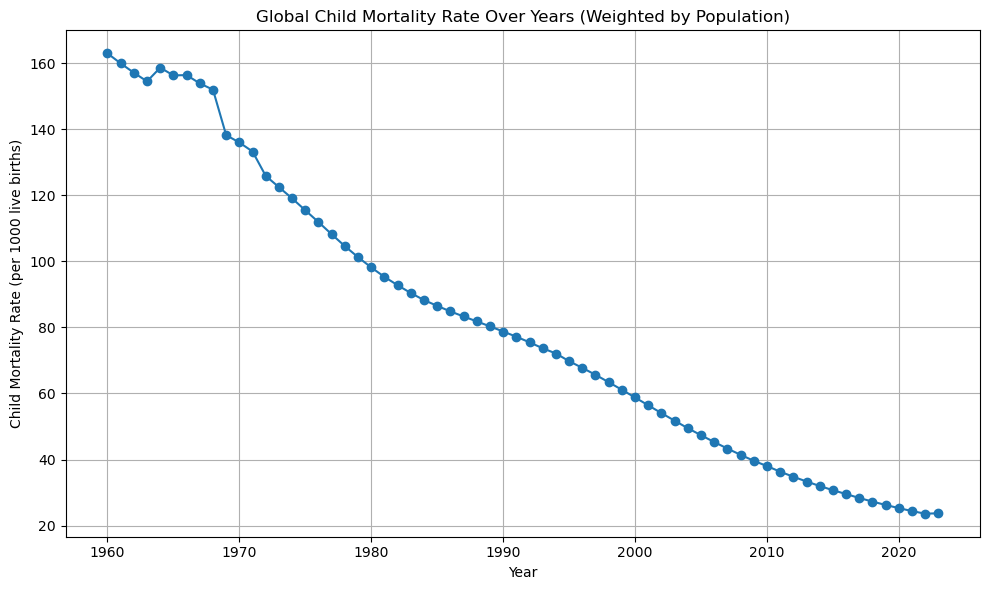

In [16]:
import matplotlib.pyplot as plt

# Plotting global child mortality rate over time
plt.figure(figsize=(10, 6))
plt.plot(child_mortality_selected['year'], child_mortality_selected['global_mortality_excl_missing'], marker='o')
plt.title('Global Child Mortality Rate Over Years (Weighted by Population)')
plt.xlabel('Year')
plt.ylabel('Child Mortality Rate (per 1000 live births)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Filter the DataFrame to include only years from 1985 onward
child_mortality_selected_1985 = child_mortality_selected[child_mortality_selected['year'] >= 1985]

# Display the tail of the filtered DataFrame to confirm
child_mortality_selected_1985.head()


,year,Uganda,Nigeria,Rwanda,Senegal,Ethiopia,Algeria,"Egypt, Arab Rep.",South Africa,Morocco,...,Kiribati,Marshall Islands,"Micronesia, Fed. Sts.",Nauru,Samoa,Solomon Islands,Tonga,total,global_mortality_rate,global_mortality_excl_missing
25,1985,197.0,207.5,160.4,171.4,223.1,74.4,118.9,75.0,103.3,...,108.1,56.6,56.8,85.8,35.4,43.7,25.8,68.076667,86.524548,86.524548
26,1986,193.6,208.4,155.4,163.1,219.1,64.8,110.0,71.8,98.0,...,105.2,55.0,55.5,81.8,34.1,42.4,25.2,65.576667,84.846808,84.846808
27,1987,191.2,209.2,151.5,155.0,215.1,58.5,102.3,68.9,93.1,...,102.1,53.2,54.0,77.9,32.9,41.3,24.5,63.331667,83.320994,83.320994
28,1988,189.0,209.7,148.6,147.9,211.1,54.5,95.7,66.3,88.6,...,98.5,51.4,52.5,74.1,31.7,40.2,23.8,61.218333,81.821884,81.821884
29,1989,186.3,209.9,148.1,142.3,207.0,52.2,90.3,64.1,84.5,...,94.8,49.5,50.9,70.5,30.7,39.2,23.0,59.221667,80.326745,80.326745


In [18]:
child_mortality_selected_1985.drop('global_mortality_excl_missing', axis=1)

,year,Uganda,Nigeria,Rwanda,Senegal,Ethiopia,Algeria,"Egypt, Arab Rep.",South Africa,Morocco,...,Palau,Kiribati,Marshall Islands,"Micronesia, Fed. Sts.",Nauru,Samoa,Solomon Islands,Tonga,total,global_mortality_rate
25,1985,197.0,207.5,160.4,171.4,223.1,74.4,118.9,75.0,103.3,...,39.0,108.1,56.6,56.8,85.8,35.4,43.7,25.8,68.076667,86.524548
26,1986,193.6,208.4,155.4,163.1,219.1,64.8,110.0,71.8,98.0,...,38.1,105.2,55.0,55.5,81.8,34.1,42.4,25.2,65.576667,84.846808
27,1987,191.2,209.2,151.5,155.0,215.1,58.5,102.3,68.9,93.1,...,37.3,102.1,53.2,54.0,77.9,32.9,41.3,24.5,63.331667,83.320994
28,1988,189.0,209.7,148.6,147.9,211.1,54.5,95.7,66.3,88.6,...,36.7,98.5,51.4,52.5,74.1,31.7,40.2,23.8,61.218333,81.821884
29,1989,186.3,209.9,148.1,142.3,207.0,52.2,90.3,64.1,84.5,...,36.1,94.8,49.5,50.9,70.5,30.7,39.2,23.0,59.221667,80.326745
30,1990,182.5,209.6,152.1,138.5,202.5,51.0,85.7,62.3,80.8,...,35.5,91.1,47.7,49.5,67.1,29.8,38.1,22.2,57.383333,78.764975
31,1991,178.4,209.1,161.3,136.5,197.5,50.4,81.4,61.0,77.3,...,34.8,87.5,45.9,48.2,63.8,28.9,37.1,21.4,55.736667,77.187584
32,1992,174.3,208.3,174.2,136.0,192.1,50.0,77.3,60.2,74.0,...,34.1,84.2,44.3,47.2,60.7,28.0,36.2,20.6,54.278333,75.487853
33,1993,170.5,207.2,189.8,136.4,186.0,49.5,73.1,60.0,70.9,...,33.3,81.2,43.0,46.3,57.7,27.0,35.2,20.0,52.938333,73.688153
34,1994,167.3,205.9,385.5,137.4,179.6,48.9,68.8,60.4,67.9,...,32.4,78.6,42.0,45.4,54.9,26.1,34.3,19.4,54.686667,72.106870


In [19]:
child_mortality_selected_1985.to_csv('datasets_from_1985_total/1985_child_mortality_selected.csv', index=False)

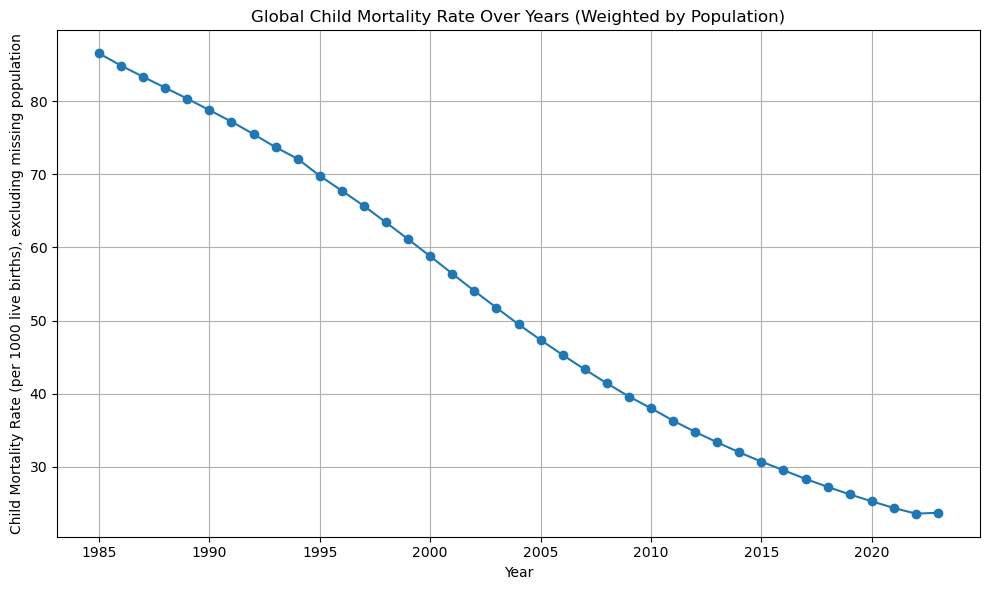

In [20]:
# Plotting global child mortality rate over time
plt.figure(figsize=(10, 6))
plt.plot(child_mortality_selected_1985['year'], child_mortality_selected_1985['global_mortality_rate'], marker='o')
plt.title('Global Child Mortality Rate Over Years (Weighted by Population)')
plt.xlabel('Year')
plt.ylabel('Child Mortality Rate (per 1000 live births), excluding missing population')
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
fertility_selected.isnull().sum().sum()

np.int64(0)

In [22]:
# Reset index to ensure 'year' is a column
fertility_selected.reset_index(inplace=True)
population_selected.reset_index(inplace=True)

# Set 'year' as index
fertility_selected.set_index('year', inplace=True)
population_selected.set_index('year', inplace=True)

# Identify common countries between fertility and population datasets
common_countries = fertility_selected.columns.intersection(population_selected.columns)

# Calculate the population-weighted fertility rate per year
fertility_weighted = []
for year in fertility_selected.index:
    fertility_vals = fertility_selected.loc[year, common_countries]
    population_vals = population_selected.loc[year, common_countries]
    weighted_rate = (fertility_vals * population_vals).sum() / population_vals.sum()
    fertility_weighted.append(weighted_rate)

# Add the result as a new column
fertility_selected['global_fertility_rate'] = fertility_weighted

# Reset index to bring 'year' back as a column
fertility_selected.reset_index(inplace=True)

# Final output
fertility_selected


,year,index,Uganda,Nigeria,Rwanda,Senegal,Ethiopia,Algeria,"Egypt, Arab Rep.",South Africa,...,New Zealand,Palau,Kiribati,Marshall Islands,"Micronesia, Fed. Sts.",Nauru,Samoa,Solomon Islands,Tonga,global_fertility_rate
0,1960,0,6.936,6.364,8.187,6.996,6.880,7.503,6.794,6.159,...,4.24,2.840,6.553,8.234,6.686,5.269,7.646,6.970,6.885,4.888310
1,1961,1,6.968,6.353,8.194,7.038,6.877,7.564,6.779,6.138,...,4.31,2.840,6.625,8.266,6.697,5.289,7.641,6.970,6.844,4.699935
2,1962,2,6.997,6.356,8.197,7.079,6.875,7.607,6.755,6.110,...,4.19,2.840,6.557,8.285,6.700,5.290,7.646,6.970,6.804,5.433683
3,1963,3,7.023,6.349,8.198,7.120,6.872,7.649,6.718,6.077,...,4.05,2.840,6.486,8.309,6.712,5.284,7.656,6.965,6.774,5.898109
4,1964,4,7.053,6.362,8.198,7.157,6.867,7.673,6.643,6.030,...,3.80,2.840,6.411,8.330,6.734,5.302,7.667,6.964,6.734,5.606022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2019,59,4.809,5.379,3.939,4.517,4.323,2.988,3.001,2.475,...,1.72,1.122,3.368,2.824,2.801,3.618,4.047,4.104,3.315,2.181447
60,2020,60,4.693,5.309,3.873,4.454,4.243,2.942,2.960,2.401,...,1.61,0.850,3.333,2.777,2.754,3.571,3.997,4.038,3.267,2.089689
61,2021,61,4.585,5.237,3.821,4.387,4.159,2.889,2.917,2.374,...,1.64,0.850,3.304,2.729,2.711,3.519,3.930,3.983,3.237,2.045743
62,2022,62,4.468,5.143,3.749,4.314,4.063,2.829,2.878,2.341,...,1.66,0.850,3.271,2.672,2.669,3.463,3.875,3.925,3.193,2.032568


In [23]:
# Filter the DataFrame to include only years from 1985 onward
fertility_selected_1985 = fertility_selected[fertility_selected['year'] >= 1985]

# Display the tail of the filtered DataFrame to confirm
fertility_selected_1985.head()

,year,index,Uganda,Nigeria,Rwanda,Senegal,Ethiopia,Algeria,"Egypt, Arab Rep.",South Africa,...,New Zealand,Palau,Kiribati,Marshall Islands,"Micronesia, Fed. Sts.",Nauru,Samoa,Solomon Islands,Tonga,global_fertility_rate
25,1985,25,7.035,6.616,7.725,7.013,7.378,5.975,5.160,4.495,...,1.93,2.84,4.935,6.917,5.600,3.969,5.344,6.217,5.128,3.581954
26,1986,26,7.081,6.557,7.559,6.902,7.359,5.625,5.070,4.409,...,1.96,2.84,4.889,6.785,5.446,3.967,5.286,6.114,4.989,3.583641
27,1987,27,7.119,6.504,7.390,6.785,7.338,5.327,4.989,4.352,...,2.03,2.84,4.822,6.636,5.299,3.966,5.190,5.990,4.864,3.560429
28,1988,28,7.105,6.498,7.227,6.577,7.303,5.059,4.871,4.180,...,2.10,2.84,4.754,6.438,5.167,3.958,5.089,5.883,4.763,3.453031
29,1989,29,7.072,6.494,7.058,6.479,7.271,4.826,4.685,3.983,...,2.12,2.84,4.700,6.238,5.052,3.961,4.990,5.775,4.691,3.410977


In [24]:
fertility_selected_1985.to_csv('datasets_from_1985_total/1985_fertility_rate_selected.csv', index=False)

In [25]:
# Reset index to ensure 'year' is a column
education_selected.reset_index(inplace=True)
population_selected.reset_index(inplace=True)

# Set 'year' as index
education_selected.set_index('year', inplace=True)
population_selected.set_index('year', inplace=True)

# Identify common countries between fertility and population datasets
common_countries = education_selected.columns.intersection(population_selected.columns)

# Calculate the population-weighted fertility rate per year
education_weighted = []
for year in education_selected.index:
    education_vals = education_selected.loc[year, common_countries]
    population_vals = population_selected.loc[year, common_countries]
    weighted_rate = (education_vals * population_vals).sum() / population_vals.sum()
    education_weighted.append(weighted_rate)

# Add the result as a new column
education_selected['global_education'] = education_weighted

# Reset index to bring 'year' back as a column
education_selected.reset_index(inplace=True)

# Final output
education_selected


,year,index,Uganda,Nigeria,Rwanda,Senegal,Ethiopia,Algeria,"Egypt, Arab Rep.",South Africa,...,New Zealand,Palau,Kiribati,Marshall Islands,"Micronesia, Fed. Sts.",Nauru,Samoa,Solomon Islands,Tonga,global_education
0,1960,0,6.220000,43.299999,1.290000,4.600000,4.640000,0.790000,11.090000,29.940001,...,55.410000,96.889999,6.600000,91.639999,76.150253,96.824905,29.530001,38.159126,52.669998,22.988885
1,1961,1,6.220000,43.299999,1.290000,4.600000,4.640000,0.790000,11.090000,29.940001,...,55.410000,96.889999,6.600000,91.639999,76.150253,96.824905,29.530001,38.159126,52.669998,22.972729
2,1962,2,6.220000,43.299999,1.290000,4.600000,4.640000,0.790000,11.090000,29.940001,...,55.410000,96.889999,6.600000,91.639999,76.150253,96.824905,29.530001,38.159126,52.669998,22.898966
3,1963,3,6.220000,43.299999,1.290000,4.600000,4.640000,0.790000,11.090000,29.940001,...,55.410000,96.889999,6.600000,91.639999,76.150253,96.824905,29.530001,38.159126,52.669998,22.776153
4,1964,4,6.220000,43.299999,1.290000,4.600000,4.640000,0.790000,11.090000,29.940001,...,55.410000,96.889999,6.600000,91.639999,76.150253,96.824905,29.530001,38.159126,52.669998,22.657719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2019,59,20.411684,34.904331,18.204386,8.949590,7.491560,42.624008,72.475998,68.900002,...,81.563766,95.336336,84.129799,95.371704,76.150253,78.564026,92.442307,38.159126,93.938543,54.243168
60,2020,60,26.551011,38.647202,14.601600,11.089991,9.983793,42.624008,47.676075,78.295120,...,82.029999,95.782043,84.961761,81.463348,76.150253,75.520546,93.099309,38.159126,94.046763,56.041861
61,2021,61,32.690338,42.390072,20.875448,13.230393,12.476027,42.624008,46.811863,83.040001,...,82.029999,95.782043,84.961761,67.554993,76.150253,72.477066,93.756312,38.159126,94.154984,56.758035
62,2022,62,32.690338,64.689270,15.740000,15.370794,12.476027,42.624008,46.811863,76.060196,...,82.029999,95.782043,84.961761,67.554993,76.150253,72.477066,94.413315,38.159126,94.154984,57.474699


In [26]:
# Filter the DataFrame to include only years from 1985 onward
education_selected_1985 = education_selected[education_selected['year'] >= 1985]

# Display the tail of the filtered DataFrame to confirm
education_selected_1985.head()

,year,index,Uganda,Nigeria,Rwanda,Senegal,Ethiopia,Algeria,"Egypt, Arab Rep.",South Africa,...,New Zealand,Palau,Kiribati,Marshall Islands,"Micronesia, Fed. Sts.",Nauru,Samoa,Solomon Islands,Tonga,global_education
25,1985,25,6.22,43.299999,2.965882,4.6,4.64,10.2330,11.090,27.75000,...,57.430000,96.889999,20.882380,91.639999,76.150253,96.824905,46.871294,38.159126,52.669998,28.108512
26,1986,26,6.22,43.299999,3.205294,4.6,4.64,10.9075,11.090,29.36625,...,57.934999,96.889999,22.922721,91.639999,76.150253,96.824905,48.211618,38.159126,52.669998,28.907857
27,1987,27,6.22,43.299999,3.444706,4.6,4.64,11.5820,14.495,30.98250,...,58.439999,96.889999,24.963061,91.639999,76.150253,96.824905,49.551942,38.159126,54.650999,29.704693
28,1988,28,6.22,43.299999,3.684118,4.6,4.64,12.2565,17.900,32.59875,...,58.944999,96.889999,27.003401,91.639999,76.150253,96.824905,50.892266,38.159126,56.631999,30.503023
29,1989,29,6.22,43.299999,3.923529,4.6,4.64,12.9310,21.305,34.21500,...,59.449999,96.889999,29.043741,91.639999,76.150253,96.824905,52.232590,38.159126,58.613000,31.306008


In [27]:
education_selected_1985 = education_selected_1985.drop(['index'], axis=1)


In [28]:
education_selected_1985.to_csv('datasets_from_1985_total/1985_education_rate_selected.csv', index=False)

In [29]:
gdp_selected = gdp_selected.rename(columns={
    "Egypt, Arab Rep.": "Egypt",
    "Yemen, Rep.": "Yemen",
    "Micronesia, Fed. Sts." : "Micronesia, Federated States of"
})


In [30]:
# Ensure 'year' is a column
gdp_selected = gdp_selected.reset_index() if gdp_selected.index.name == 'year' else gdp_selected
population_selected = population_selected.reset_index() if population_selected.index.name == 'year' else population_selected

# Drop 'year' column to focus only on country columns
country_columns = gdp_selected.columns.drop('year')

# Calculate total GDP per year
total_gdp = (gdp_selected[country_columns] * population_selected[country_columns]).sum(axis=1)

# Calculate total population per year
total_population = population_selected[country_columns].sum(axis=1)

# Add global GDP per capita column
gdp_selected['gdp_per_person'] = total_gdp / total_population


In [31]:
gdp_selected

,year,Uganda,Nigeria,Rwanda,Senegal,Ethiopia,Algeria,Egypt,South Africa,Morocco,...,New Zealand,Palau,Kiribati,Marshall Islands,"Micronesia, Federated States of",Nauru,Samoa,Solomon Islands,Tonga,gdp_per_person
0,1960,55.378498,93.137009,39.374073,300.425115,75.339609,238.392477,156.387391,532.147504,174.784134,...,2334.133825,1017.157020,201.023775,373.212872,337.495774,2618.534459,321.996707,153.450784,349.470975,514.862927
1,1961,56.175928,97.137528,39.268971,308.166384,76.730197,209.370673,162.841637,545.657512,169.318436,...,2364.753944,1017.157020,201.023775,373.212872,337.495774,2618.534459,321.996707,153.450784,349.470975,526.748033
2,1962,55.504870,104.532496,39.233844,307.092565,77.790185,169.602863,142.409573,563.423009,193.647812,...,2471.055119,1017.157020,201.023775,373.212872,337.495774,2618.534459,321.996707,153.450784,349.470975,546.489948
3,1963,61.955377,107.675741,39.277177,308.629849,79.172634,225.584660,143.928399,604.536855,210.635651,...,2646.236647,1017.157020,201.023775,373.212872,337.495774,2618.534459,321.996707,153.450784,349.470975,565.975979
4,1964,68.625993,113.297346,38.982448,317.850427,83.836865,238.863802,157.716532,645.873376,216.263046,...,2839.315673,1017.157020,201.023775,373.212872,337.495774,2618.534459,321.996707,153.450784,349.470975,602.273091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2019,822.057058,2265.155209,810.051420,1431.181289,828.708972,4468.453419,2962.988920,6533.711210,3508.097656,...,42747.209930,15841.193533,1750.997509,5292.339855,3572.659183,10776.828461,4351.942349,2223.665026,4676.847903,11269.783190
60,2020,845.766464,2019.657063,778.701539,1461.087204,905.313176,3743.541952,3511.113810,5580.603831,3268.030273,...,41785.692291,14556.589689,1769.432118,5661.967873,3353.889430,10695.699330,4099.660091,2063.331015,4700.449328,10949.413775
61,2021,882.791718,2017.274865,828.833033,1598.106770,910.947840,4160.559267,3827.354154,6843.399419,3785.936279,...,49624.181673,13257.206672,2253.825001,6258.611937,3493.872286,14989.664745,3947.645179,1996.869768,4912.579506,12416.428089
62,2022,963.067314,2139.374785,975.469316,1564.745221,1011.073286,4961.552577,4233.307837,6523.410978,3455.396240,...,48216.509584,14392.199026,2075.908441,6322.828555,3835.381843,13287.271189,3869.466395,2005.413993,4933.074791,12952.224969


In [32]:
# Filter the DataFrame to include only years from 1985 onward
gdp_selected_1985 = gdp_selected[gdp_selected['year'] >= 1985]

# Display the tail of the filtered DataFrame to confirm
gdp_selected_1985.head()

,year,Uganda,Nigeria,Rwanda,Senegal,Ethiopia,Algeria,Egypt,South Africa,Morocco,...,New Zealand,Palau,Kiribati,Marshall Islands,"Micronesia, Federated States of",Nauru,Samoa,Solomon Islands,Tonga,gdp_per_person
25,1985,234.276503,868.640541,271.578979,571.417166,243.897383,2632.517111,769.755137,1839.484191,673.290039,...,7600.565242,3728.129530,392.905065,1162.019014,1136.276333,4858.933517,572.806388,586.022352,612.943576,2597.138501
26,1986,253.643059,628.248454,297.725982,783.940525,245.977229,2800.202708,790.201794,2027.466204,855.169312,...,9427.553940,4143.562037,381.918759,1425.164181,1216.157631,4568.678877,604.257419,505.821807,695.805077,2892.212705
27,1987,392.970743,587.956613,319.643663,916.094841,254.121329,2847.077669,753.722264,2586.274233,937.457153,...,12330.916831,4616.290289,423.822473,1542.642304,1230.441567,4484.508146,666.308337,514.669333,830.153020,3143.610253
28,1988,395.187661,539.539468,343.781326,880.487755,253.248262,2450.872421,633.839369,2702.055048,1086.035278,...,13759.155630,5145.006145,535.915135,1670.281893,1284.282728,5011.580315,790.134992,567.022936,1077.683592,3453.246266
29,1989,310.186025,465.488090,334.741963,848.555548,256.386475,2247.460271,701.037718,2726.709807,1091.276245,...,13312.385586,5741.086852,514.652948,1670.215207,1365.615183,5722.767422,728.151129,538.101763,1069.835468,3576.389733


In [33]:
gdp_selected_1985.to_csv('datasets_from_1985_total/1985_gdp_selected.csv', index=False)

In [34]:
population_selected['population_total'] = population_selected.sum(axis=1)


In [35]:
# Reset the index so 'year' becomes a column
population_selected = population_selected.reset_index()

# Now you can filter by year
population_selected_1985 = population_selected[population_selected['year'] >= 1985]

# Confirm the result
population_selected_1985.head()


,index,year,Uganda,Nigeria,Rwanda,Senegal,Ethiopia,Algeria,Egypt,South Africa,...,New Zealand,Palau,Kiribati,Marshall Islands,"Micronesia, Federated States of",Nauru,Samoa,Solomon Islands,Tonga,population_total
25,25,1985,15023681.0,84897973.0,6317228.0,6683287.0,39842136.0,22008544.0,50734968.0,35042093.0,...,3247100.0,13688.0,66496.0,37761.0,89707.0,8551.0,166849.0,282455.0,97984.0,3.265751e+09
26,26,1986,15467579.0,87235953.0,6531881.0,6878192.0,41037656.0,22745499.0,52206295.0,36180515.0,...,3246300.0,14024.0,68059.0,39286.0,92266.0,8742.0,167061.0,291842.0,98010.0,3.327210e+09
27,27,1987,15954170.0,89591716.0,6749493.0,7081530.0,42460039.0,23443624.0,53674435.0,37326190.0,...,3274400.0,14334.0,69733.0,40828.0,94844.0,8946.0,167661.0,301414.0,98376.0,3.390979e+09
28,28,1988,16470483.0,92020090.0,6968071.0,7289618.0,44150825.0,24109536.0,55187681.0,38480649.0,...,3283400.0,14645.0,71427.0,42321.0,97097.0,9165.0,168346.0,311265.0,98969.0,3.455750e+09
29,29,1989,17010698.0,94531014.0,7184706.0,7502207.0,45879690.0,24754485.0,56710642.0,39628575.0,...,3299200.0,14945.0,73147.0,43586.0,99003.0,9390.0,168768.0,321282.0,99403.0,3.520446e+09


In [36]:
population_selected_1985.to_csv('datasets_from_1985_total/1985_population_selected.csv', index=False)